In [3]:
import os
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import matplotlib.pylab as plt
from itertools import cycle
import plotly.express as px
import plotly.graph_objects as go

from utils import *
from eval_func import *

In [2]:
df_sales = pd.read_csv('../data/sales_train_validation.csv', 
                       index_col='item_id')
df_prices = pd.read_csv('../data/sell_prices.csv')
df_calendar = pd.read_csv('../data/calendar.csv', 
                          index_col = 'date')
first_date = 'd_1'
last_date = 'd_1913'

In [3]:
df_sales.head()

,id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
item_id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_001,HOBBIES_1_001_CA_1_validation,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
HOBBIES_1_002,HOBBIES_1_002_CA_1_validation,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
HOBBIES_1_003,HOBBIES_1_003_CA_1_validation,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
HOBBIES_1_004,HOBBIES_1_004_CA_1_validation,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
HOBBIES_1_005,HOBBIES_1_005_CA_1_validation,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [4]:
df_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [5]:
df_calendar.head()

,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,
2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [6]:
dates = df_calendar.drop(['wm_yr_wk', 'wday'], axis = 1)
dates['Date'] = dates.index
dates.index = dates['d']
dates = dates.fillna(0)

my_labeler = LabelEncoder()
for i in ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']:
    dates[i] = my_labeler.fit_transform(dates[i].astype('str'))

In [7]:
dates.head()

,weekday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,Date
d,,,,,,,,,,,,
d_1,Saturday,1,2011,d_1,0,0,0,0,0,0,0,2011-01-29
d_2,Sunday,1,2011,d_2,0,0,0,0,0,0,0,2011-01-30
d_3,Monday,1,2011,d_3,0,0,0,0,0,0,0,2011-01-31
d_4,Tuesday,2,2011,d_4,0,0,0,0,1,1,0,2011-02-01
d_5,Wednesday,2,2011,d_5,0,0,0,0,1,0,1,2011-02-02


In [8]:
df_prices_stats = df_prices.loc[:,['item_id', 'sell_price']]
df_prices_stats = df_prices_stats.groupby(
    'item_id').sell_price.agg([min, max, 'mean'])
df_estados = df_sales.loc[:,'state_id':last_date]
df_estados = df_estados.groupby('state_id').sum()
df_estados_Q = pd.DataFrame(df_estados.sum(axis=1))

df_estados = df_estados.transpose()
df_estados = pd.merge(df_estados, dates, left_index= True, right_index = True)
df_estados.Date = pd.to_datetime(df_estados.Date)

In [9]:
df_estados.head()

,CA,TX,WI,weekday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,Date
d_1,14195,9438,8998,Saturday,1,2011,d_1,0,0,0,0,0,0,0,2011-01-29
d_2,13805,9630,8314,Sunday,1,2011,d_2,0,0,0,0,0,0,0,2011-01-30
d_3,10108,6778,6897,Monday,1,2011,d_3,0,0,0,0,0,0,0,2011-01-31
d_4,11047,7381,6984,Tuesday,2,2011,d_4,0,0,0,0,1,1,0,2011-02-01
d_5,9925,5912,3309,Wednesday,2,2011,d_5,0,0,0,0,1,0,1,2011-02-02


In [64]:
df_sales_tot_ = pd.DataFrame(df_sales.loc[:, first_date:last_date].sum(axis=1))
df_sales_tot_a = df_sales_tot_.groupby(df_sales_tot_.index).sum()
df_sales_tot = pd.merge(df_sales_tot_a, 
                        df_prices_stats, 
                        right_index = True,
                         left_index=True)
df_sales_tot['Total'] = df_sales_tot.iloc[:,0]*df_sales_tot.loc[:,'mean']
df_sales_tot = df_sales_tot.Total.sort_values()

df_sales_tot_l = pd.DataFrame(df_sales_tot[:20])
df_sales_tot_h = pd.DataFrame(df_sales_tot[-20:])

In [67]:
fig_a = px.bar(df_sales_tot_l, x = df_sales_tot_l.index, y = df_sales_tot_l.iloc[:,0])
fig_a.show()

In [66]:
fig_a = px.bar(df_sales_tot_h, x = df_sales_tot_h.index, y = df_sales_tot_h.iloc[:,0])
fig_a.show()

In [21]:
pms = df_sales_tot_.index
pms_a = pd.DataFrame(df_sales.loc[pms, first_date:last_date])
pms_ = pms_a.groupby(pms_a.index).sum().transpose()
pms_d = pd.merge(pms_, dates, left_index = True, right_index = True)

fig_c = go.Figure()
fig_c.add_trace(go.Scatter(x=pms_d.Date, y=pms_d.iloc[:,0], name=pms_d.columns[0],
                         line_color='green'))
fig_c.update_layout(title_text=pms_d.columns[0],
                    xaxis_rangeslider_visible=True)
fig_c.show()

In [26]:
fig_c = go.Figure()
fig_c.add_trace(go.Scatter(x=pms_d.Date, y=pms_d.iloc[:,2], name=pms_d.columns[2],
                         line_color='red'))
fig_c.update_layout(title_text=pms_d.columns[2],
                    xaxis_rangeslider_visible=True)
fig_c.show()

In [27]:
fig_c = go.Figure()
fig_c.add_trace(go.Scatter(x=pms_d.Date, y=pms_d.iloc[:,4], name=pms_d.columns[4],
                         line_color='blue'))
fig_c.update_layout(title_text=pms_d.columns[4],
                    xaxis_rangeslider_visible=True)
fig_c.show()

In [28]:
fig_c = go.Figure()
fig_c.add_trace(go.Scatter(x=pms_d.Date, y=pms_d.iloc[:,6], name=pms_d.columns[6],
                         line_color='gray'))
fig_c.update_layout(title_text=pms_d.columns[6],
                    xaxis_rangeslider_visible=True)
fig_c.show()

In [29]:
fig_c = go.Figure()
fig_c.add_trace(go.Scatter(x=pms_d.Date, y=pms_d.iloc[:,8], name=pms_d.columns[8],
                         line_color='yellow'))
fig_c.update_layout(title_text=pms_d.columns[8],
                    xaxis_rangeslider_visible=True)
fig_c.show()

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_estados.Date, y=df_estados['CA'], name="CA",
                         line_color='red'))
fig.add_trace(go.Scatter(x=df_estados.Date, y=df_estados['TX'], name="TX",
                         line_color='green'))
fig.add_trace(go.Scatter(x=df_estados.Date, y=df_estados['WI'], name="WI",
                         line_color='gray'))
fig.update_layout(title_text='States',
                  xaxis_rangeslider_visible=True)
fig.show()

In [43]:
df_weekday = df_estados.loc[:,['CA', 'TX', 'WI', 'weekday']]
df_weekday = df_estados.groupby('weekday').sum()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_weekday.index,
    y=df_weekday.CA,
    name='CA',
    marker_color='red'
    ))
fig.add_trace(go.Bar(
    x=df_weekday.index,
    y=df_weekday.TX,
    name='TX',
    marker_color='blue'
    ))
fig.add_trace(go.Bar(
    x=df_weekday.index,
    y=df_weekday.WI,
    name='WI',
    marker_color='gray'
    ))

fig.update_layout(
    title='Sells per weekday',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of sells',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig.show()

In [44]:
df_month = df_estados.loc[:,['CA', 'TX', 'WI', 'month']]
df_month = df_estados.groupby('month').sum()
df_month.sort_values('CA')
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_month.index,
    y=df_month.CA,
    name='CA',
    marker_color='red'
    ))
fig.add_trace(go.Bar(
    x=df_month.index,
    y=df_month.TX,
    name='TX',
    marker_color='blue'
    ))
fig.add_trace(go.Bar(
    x=df_month.index,
    y=df_month.WI,
    name='WI',
    marker_color='gray'
    ))

fig.update_layout(
    title='Sells per month',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of sells',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig.show()

In [45]:
df_year = df_estados.loc[:,['CA', 'TX', 'WI', 'year']]
df_year = df_estados.groupby('year').sum()
df_year.sort_values('CA')
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_year.index,
    y=df_year.CA,
    name='CA',
    marker_color='red'
    ))
fig.add_trace(go.Bar(
    x=df_year.index,
    y=df_year.TX,
    name='TX',
    marker_color='blue'
    ))
fig.add_trace(go.Bar(
    x=df_year.index,
    y=df_year.WI,
    name='WI',
    marker_color='gray'
    ))

fig.update_layout(
    title='Sells per year',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of sells',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig.show()

In [4]:
INPUT_DIR = '../data/'
cal = pd.read_csv(f'{INPUT_DIR}/calendar.csv')
stv = pd.read_csv(f'{INPUT_DIR}/sales_train_validation.csv')
ss = pd.read_csv(f'{INPUT_DIR}/sample_submission.csv')
sellp = pd.read_csv(f'{INPUT_DIR}/sell_prices.csv')

plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

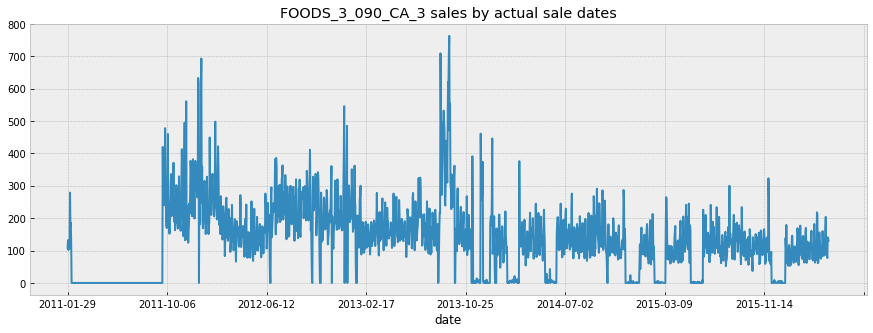

In [5]:
d_cols = [c for c in stv.columns if 'd_' in c]

example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T
example = example.rename(columns={8412:'FOODS_3_090_CA_3'})
example = example.reset_index().rename(columns={'index': 'd'})
example = example.merge(cal, how='left', validate='1:1')
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

example2 = stv.loc[stv['id'] == 'HOBBIES_1_234_CA_3_validation'][d_cols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'})
example2 = example2.reset_index().rename(columns={'index': 'd'})
example2 = example2.merge(cal, how='left', validate='1:1')

example3 = stv.loc[stv['id'] == 'HOUSEHOLD_1_118_CA_3_validation'][d_cols].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3'})
example3 = example3.reset_index().rename(columns={'index': 'd'})
example3 = example3.merge(cal, how='left', validate='1:1')

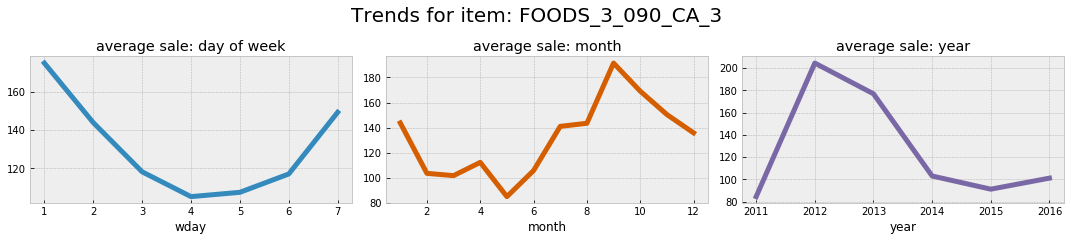

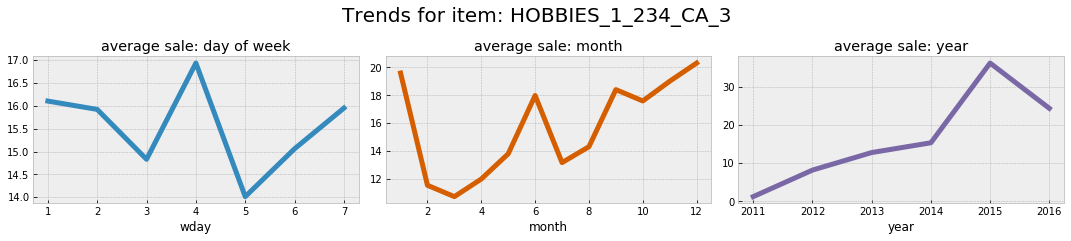

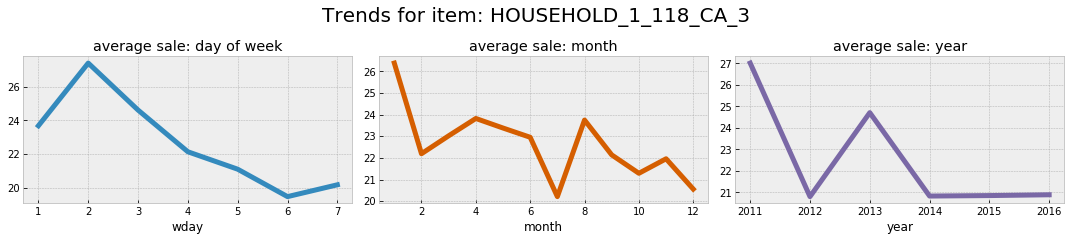

In [6]:
examples = ['FOODS_3_090_CA_3','HOBBIES_1_234_CA_3','HOUSEHOLD_1_118_CA_3']
example_df = [example, example2, example3]
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    example_df[i].groupby('wday').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    example_df[i].groupby('month').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4],

              ax=ax2)
    example_df[i].groupby('year').mean()[examples[i]] \
        .plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],

              ax=ax3)
    fig.suptitle(f'Trends for item: {examples[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

In [7]:
twenty_examples = stv.sample(20, random_state=529) \
        .set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

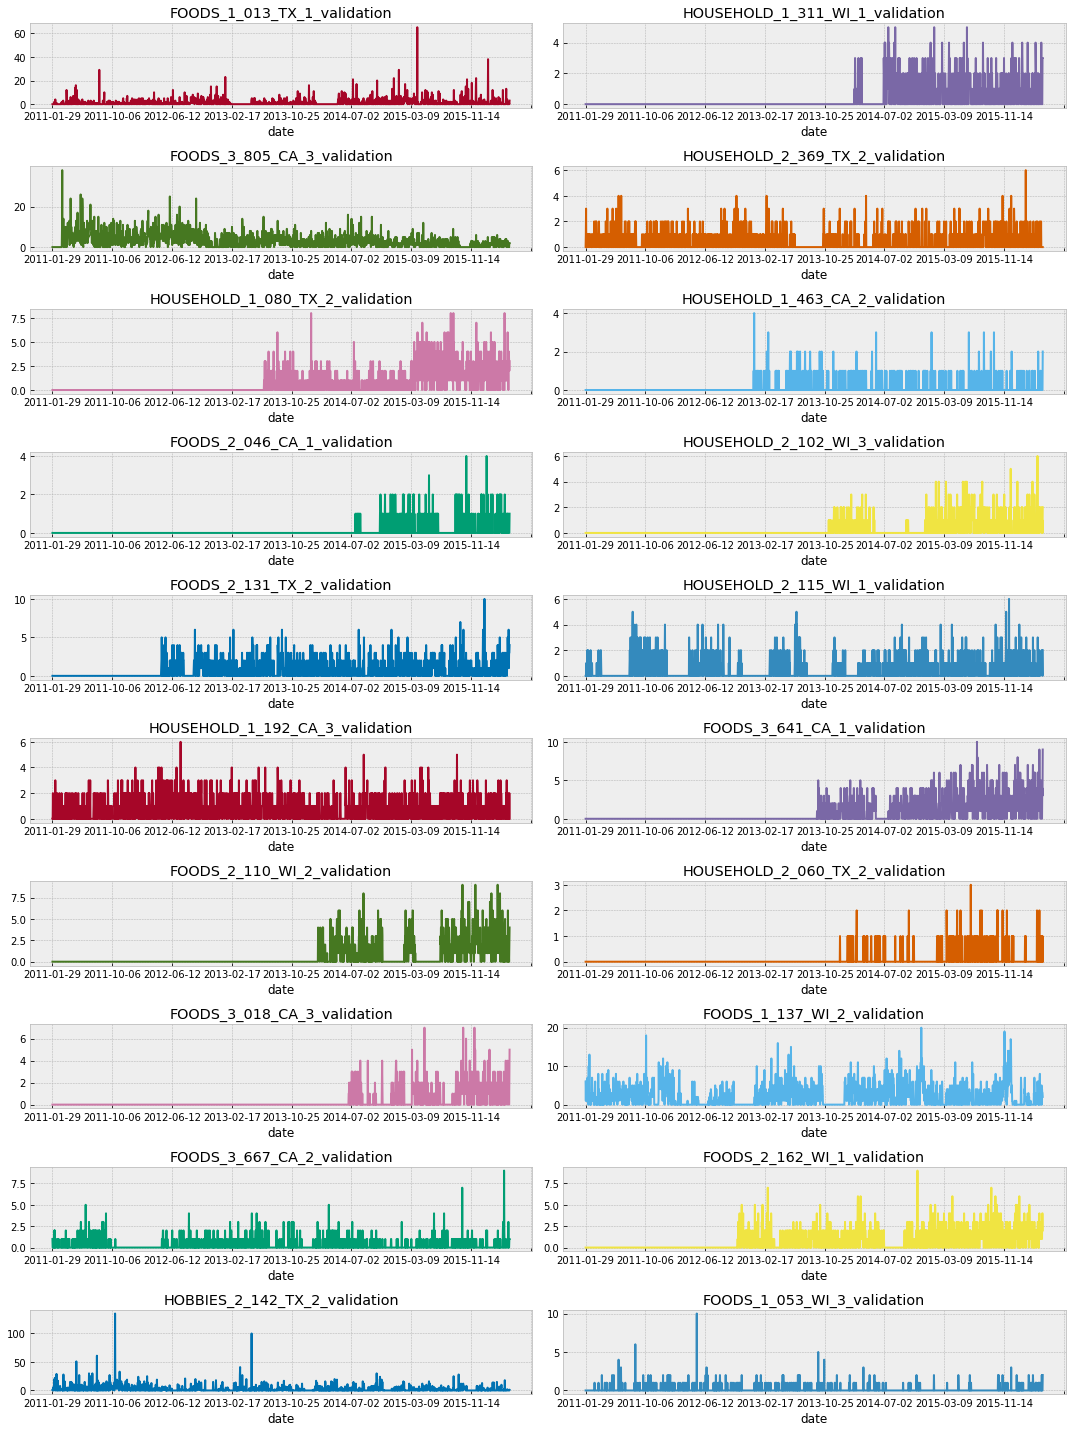

In [8]:
fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

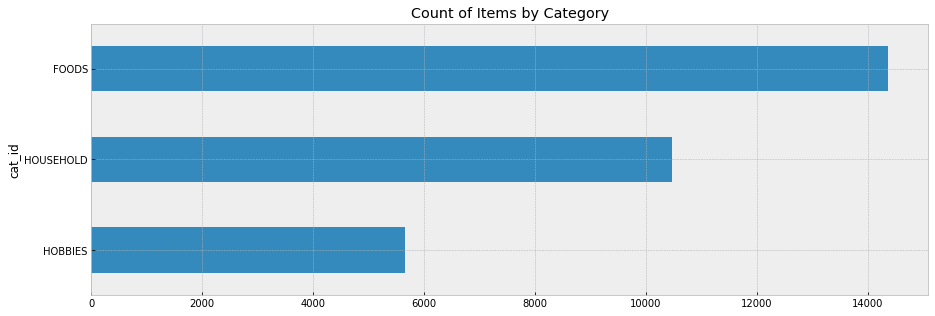

In [9]:
stv.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

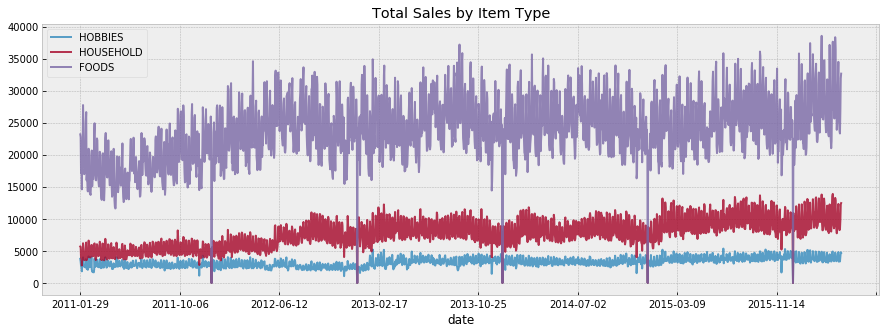

In [10]:
past_sales = stv.set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')


for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(stv['cat_id'].unique())
plt.show()

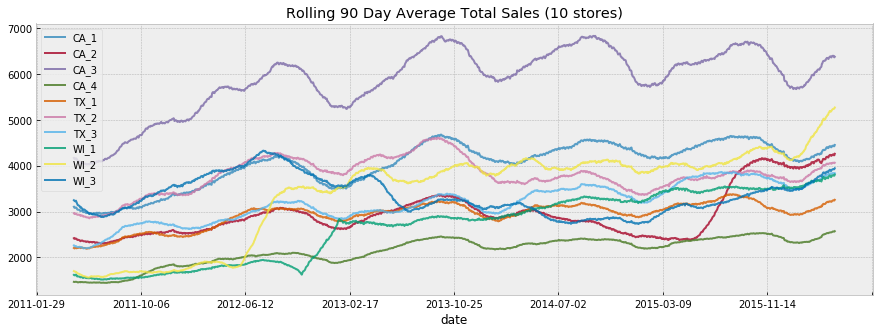

In [11]:
store_list = sellp['store_id'].unique()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 90 Day Average Total Sales (10 stores)')
plt.legend(store_list)
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta


def calmap(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    
    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    # Showing data
    ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)

In [13]:
print('The lowest sale date was:', past_sales.sum(axis=1).sort_values().index[0],
     'with', past_sales.sum(axis=1).sort_values().values[0], 'sales')
print('The lowest sale date was:', past_sales.sum(axis=1).sort_values(ascending=False).index[0],
     'with', past_sales.sum(axis=1).sort_values(ascending=False).values[0], 'sales')

The lowest sale date was: 2012-12-25 with 11 sales
The lowest sale date was: 2016-03-06 with 57218 sales


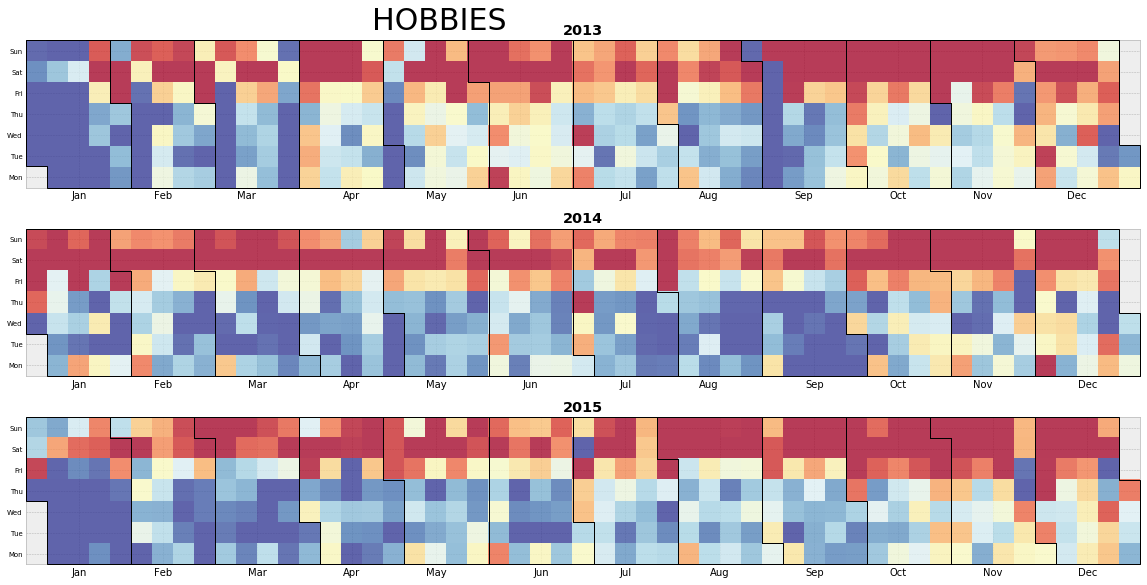

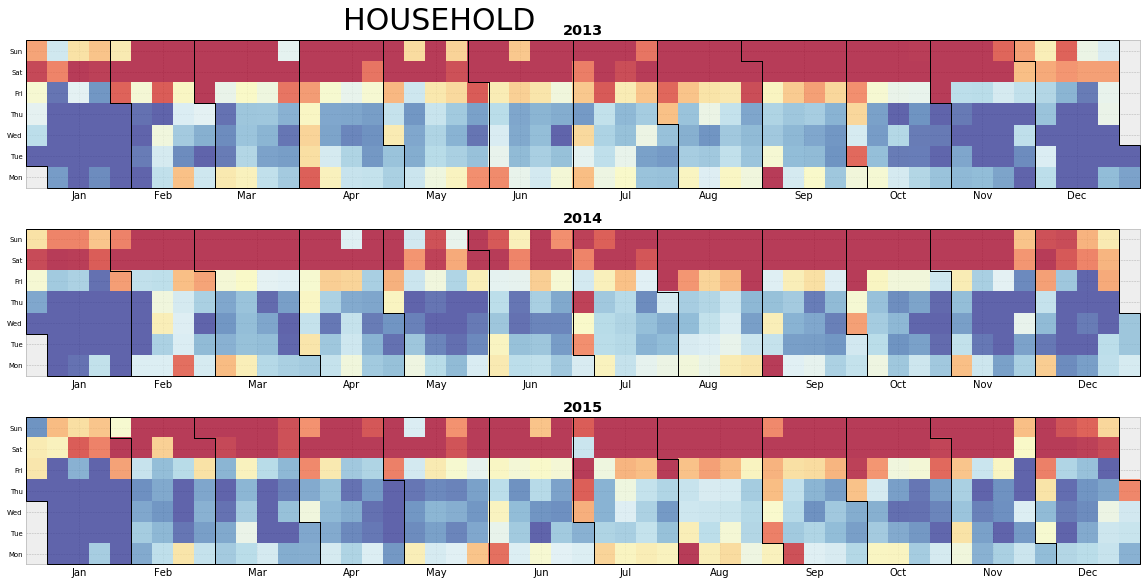

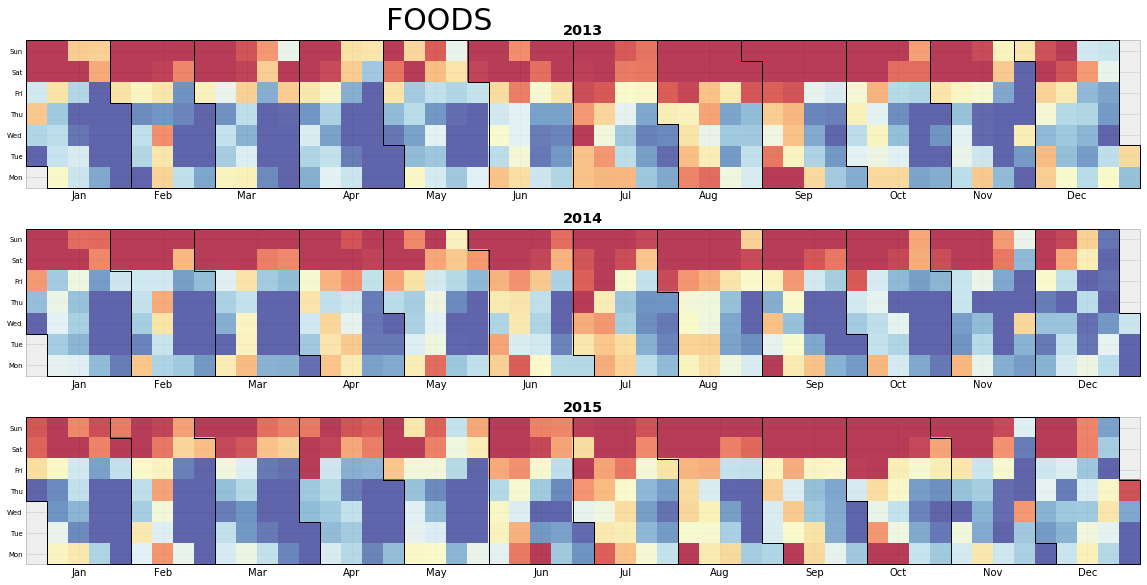

In [14]:
from sklearn.preprocessing import StandardScaler
sscale = StandardScaler()
past_sales.index = pd.to_datetime(past_sales.index)
for i in stv['cat_id'].unique():
    fig, axes = plt.subplots(3, 1, figsize=(20, 8))
    items_col = [c for c in past_sales.columns if i in c]
    sales2013 = past_sales.loc[past_sales.index.isin(pd.date_range('31-Dec-2012',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2013.values.reshape(-1, 1)))
    calmap(axes[0], 2013, vals.reshape(53,7).T)
    sales2014 = past_sales.loc[past_sales.index.isin(pd.date_range('30-Dec-2013',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2014.values.reshape(-1, 1)))
    calmap(axes[1], 2014, vals.reshape(53,7).T)
    sales2015 = past_sales.loc[past_sales.index.isin(pd.date_range('29-Dec-2014',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2015.values.reshape(-1, 1)))
    calmap(axes[2], 2015, vals.reshape(53,7).T)
    plt.suptitle(i, fontsize=30, x=0.4, y=1.01)
    plt.tight_layout()
    plt.show()